# 입문자를 위한, 파이썬/R 데이터 분석 

## Part(1) - Day05  : 

]

## Today's mission

- 데이터 수집
  - 웹 데이터 수집 개념
  - 웹 데이터 기본 구조 
  - 웹 데이터 HTML
- Python 파이썬 관련 라이브러리 : Beautiful Soup
- 실습 (1) HTML 파일 활용
- 실습 (2) Chrome 브라우저 도구활용 
- 실습 (3) yes24 베스트셀러 정보 수집

]

### 웹 데이터 수집 개념 :
 - 크롤링(crawling) 과 스크래핑(Scraping)
 - 웹 크롤러는 웹 페이지를 Chrome, IE 와 같은 브라우저로 접속하지 않고, Python 파이썬같은 프로그래밍 언어로 접속하여, 필요한 내용만 가져옴


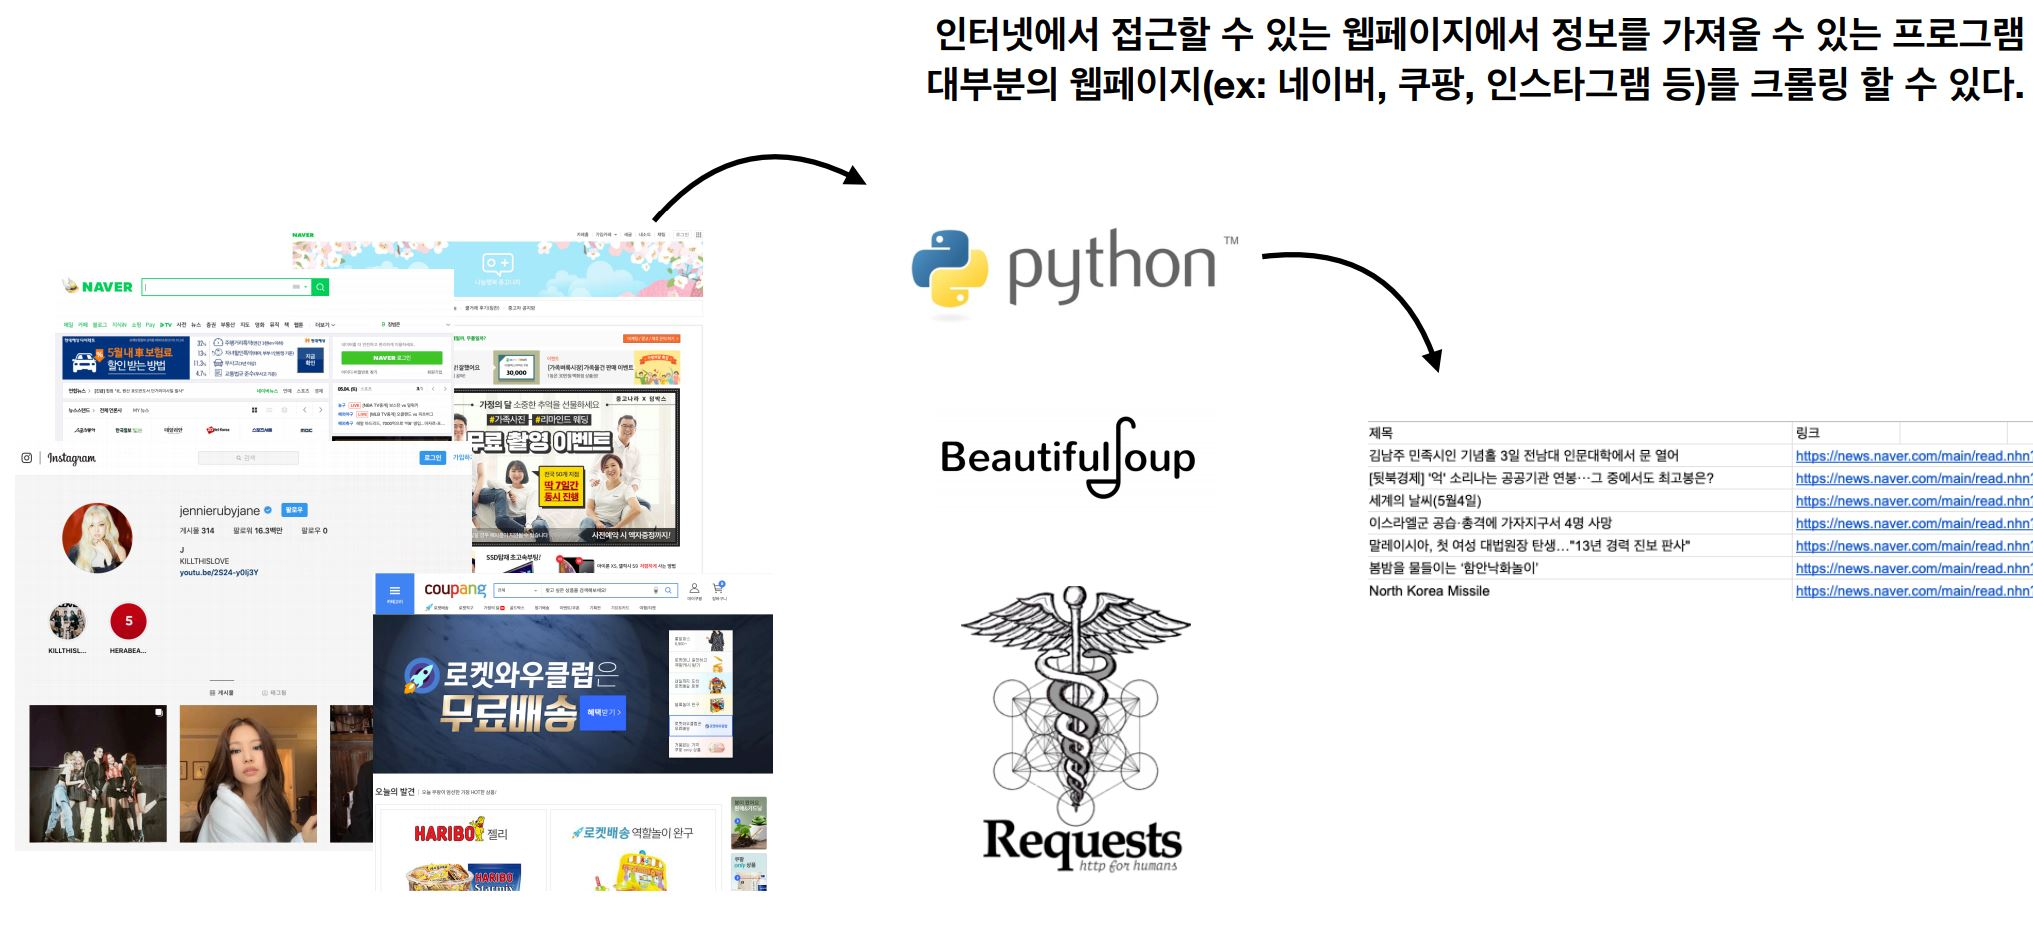

### 웹 데이터 기본 구조 :
 - CSS + HTML + Java 

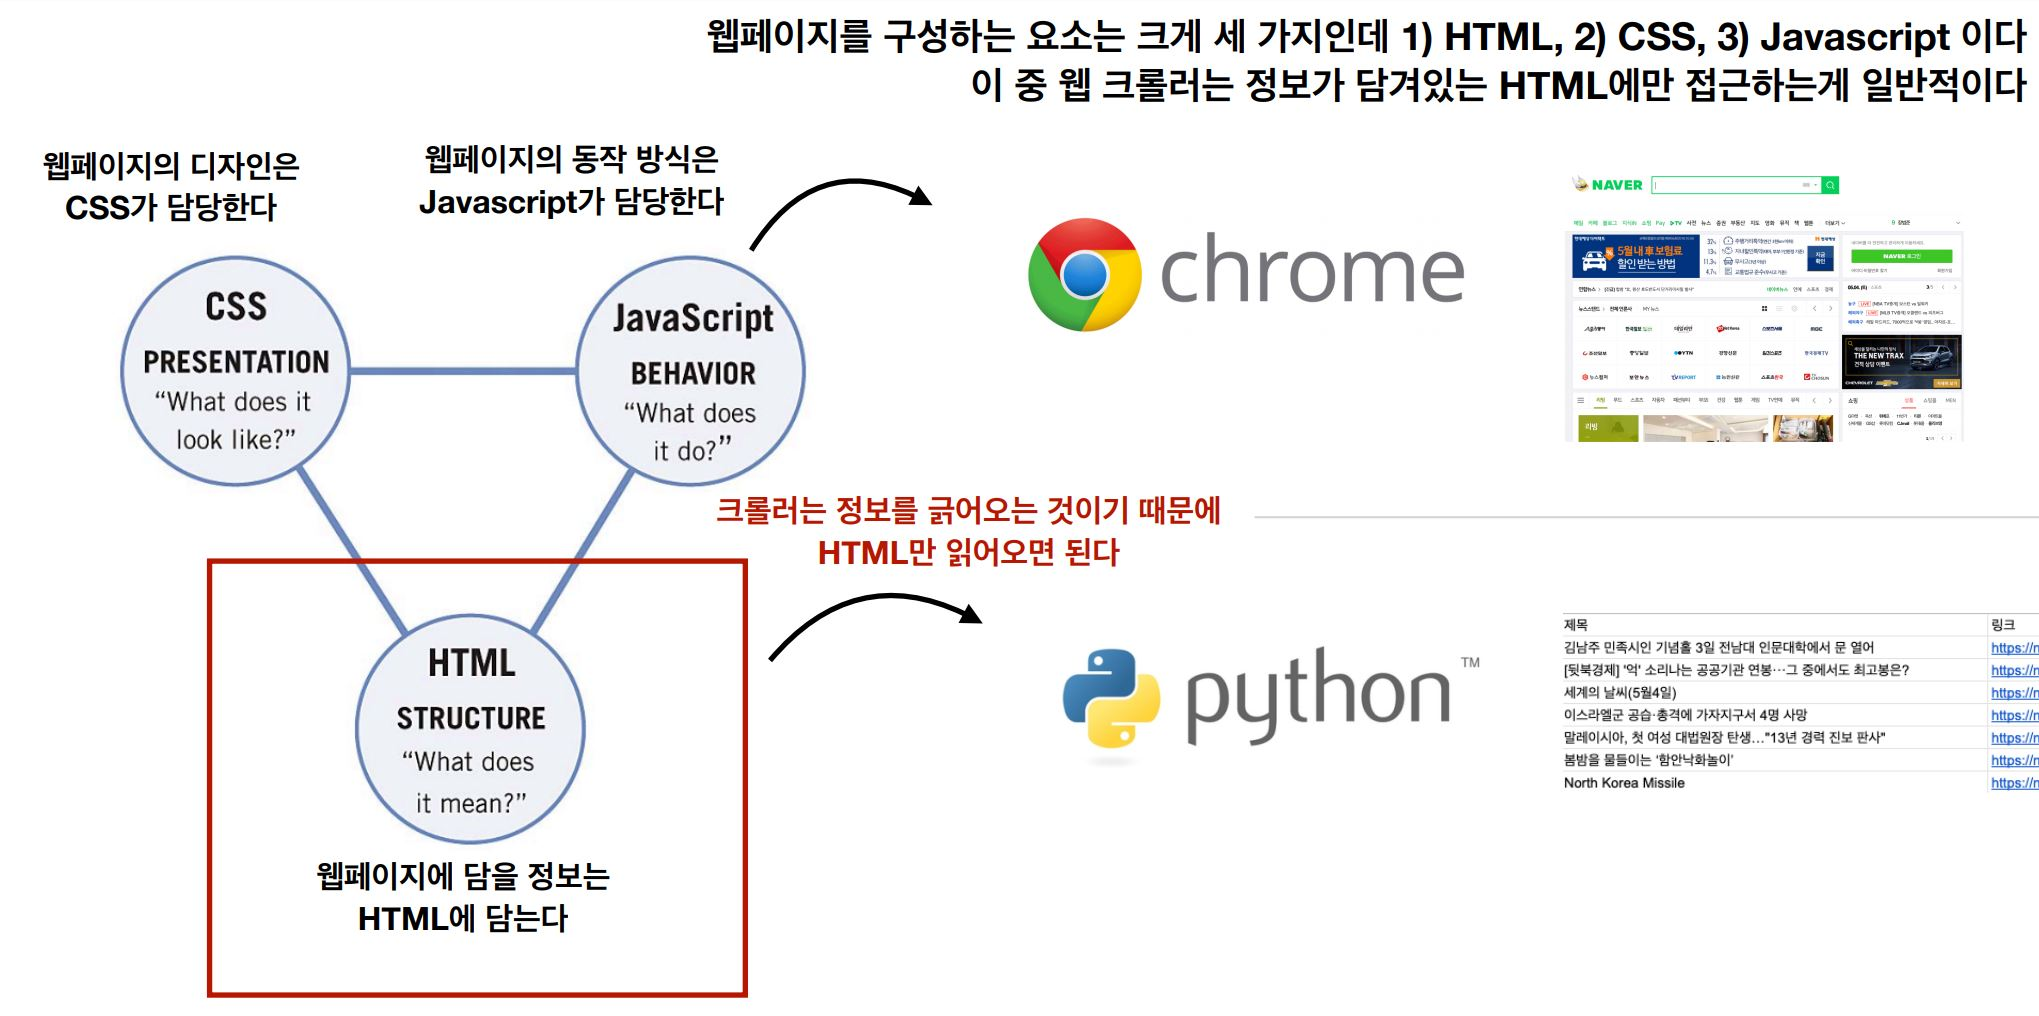

### 웹 데이터 HTML :
 - HTML코드는 웹페이지를 제공하는 사람(웹사이트 운영자)과 이를 이용하는 사람(ex: 검색엔진, 브라우저)간의 규약
 - 규약은 규약일 뿐, 너무 복잡하게 생각할 필요는 없음


##### 주요 HTML 태그

- h3 - 제목 (header)
- p - 단락 (paragraph)
- span - 개행 안 하는 단락
- div - 구역(divison)
- dl - 설명 리스트 (description list)
- dt - 설명 헤더 (description header)
- dd - 설명 내용
- img - 이미지(image)
- a - 링크(anchor)

### Python 파이썬 관련 라이브러리 : Beautiful Soup
 - 1) 뷰티플숩은 Crawling, Scraping 등을 위해 설계된 파이썬 패키지/라이브러리 
 
   (스크린 스크래핑의 대표적인 예로서, 웹 화면에서 데이터를 가져오는 웹 크롤링이라 이해하면 됨)

##### 주요 특징

- 1) HTML 구문 분석, 트리 탐색, 검색 및 수정을 위한 간단한 방법과 파이썬 기능을 활용하여 데이터 수집 프로그램 작성이 쉬움
- 2) 대부분의 문서 Encoding 자동 변환 (Unicode <-> UTF-8)   
     ex) unicode (세계문자 표준 기준코드, 16bit), UTF-8 (3bytes/1자), euc-kr (한글 2bytes/1자)
- 3) lxml, html5lib 등 기능적 라이브러리를 사용하면, 속도 및 호환성 높은 응용프로그램 제작이 가능

##### 참고 site :
- https://www.crummy.com/software/BeautifulSoup/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### 실습 (1) HTML 파일 활용
 - 자료 다운로드 : https://github.com/PinkWink/DataScience/blob/master/data/03.%20test_first.html

In [ ]:
# 패키지 설치 (일반적으로 Anaconda 에 기본으로 설치되어 있음)
#!pip install beautifulsoup4

In [ ]:
# 패키지 import
from bs4 import BeautifulSoup

참고 : [파이썬 웹 크롤링 기초 (BeautifulSoup 사용 방법)](http://hleecaster.com/python-web-crawling-with-beautifulsoup/)

#####  import      vs.     from [모듈] import 

`import` 모듈 : 해당 모듈 전체를 가져온다.



`from 모듈 import 메소드 / 변수`  :  해당 모듈 내에 있는 특정 메소드나 모듈 내 정의된 변수를 가져온다.


In [ ]:
# HTML 파일 읽어들이기
page = open("data/test_first.html",'r').read()
page

In [ ]:
# 읽어들인 HTML 문서 전체를 변수 soup 저장
soup = BeautifulSoup(page, 'html.parser')
soup

In [ ]:
print(soup.prettify())

In [ ]:
#html 코드에 포함된 한단계 아래(하위) Tag태그 정보 표시:
list(soup.children)

In [ ]:
# soup 문서 전체 저장변수 중, html 태그만 취할 경우,
html = list(soup.children)[2]
html

In [ ]:
#html 코드에 포함된 한단계 아래(하위) Tag태그 정보 표시:
list(html.children)

In [ ]:
print(list(html.children))

In [ ]:
# html 문서 전체 저장변수 중, body 태그만 취할 경우,
body = list(html.children)[3]
body

In [ ]:
# soup 저장변수에서 head, body 찾는 다른 방법
soup.head

In [ ]:
soup.body

In [ ]:
# body 저장변수 하위에 태그tag 확인방법 :
list(body.children)[3]

In [ ]:
# 유용한 명령/함수 : find, find_all
soup.find('p')                           # 1개 , 첫번째 것을 찾을 때

In [ ]:
soup.find_all('p')                       # p 태그 전체 찾을 때

In [ ]:
soup.find_all(class_="outer-text")       # class 가 outer-text 찾을 때

In [ ]:
soup.find_all(id="first")                # id 가 first인 태그 찾을 때

In [ ]:
soup.find_all('p', class_="outer-text")  # p 태그의 class가 outer-text 것 찾을 때

####  예시 :  href 속성으로 링크주소 찾아보기

In [ ]:
soup.find_all('a')      # 클릭링크에 해당하는 a 테그를 먼저 찾음

In [ ]:
link = soup.find_all('a')
link

In [ ]:
link[0]['href']

In [ ]:
link[0].string

In [ ]:
for each in link:
    print(each)
    href = each['href']
    text = each.string
    print(text, href)
    print(text + ' => ', href)
    print()

### 실습 (2) Chrome 브라우저 도구활용

##### 예시) naver 환율정보

- url = 'https://finance.naver.com/marketindex/?tabSel=exchange#tab_section'

- requests 모듈 설치:

!pip install requests

- 파이썬에서 HTTP 요청을 만들기 위한 표준으로서, 간단한 API로 요청처리를 할 수 있도록 해주는 패키지/라이브러리/모듈 

In [ ]:
#!pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# 환율정보 url GET 방식으로 요청
url = 'https://finance.naver.com/marketindex'
market_index = requests.get(url)

In [ ]:
market_index           # 200 : 응답코드 200 은 서버의 응답이 정상,   404 : url 이 잘못되거나 오류

In [ ]:
# HTML parser 이용해 soup 객체 생성
soup = BeautifulSoup(market_index.content, 'html.parser')
soup

In [ ]:
# CSS 이용해 찾습니다 #exchangeList > li.on > a.head.usd > div > span.value
#<span class="value">1,229.50</span>

price = soup.select_one('div.head_info > span.value')
print(price)

In [ ]:
# 결과에서 원하는 요소(element) 내용은 text 또는 string 통해 확인합니다
price.text

In [ ]:
price.string

In [ ]:
print('USD/KRW = ', price.text, price.string)

##### 예시) naver 영화 순위 

- url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'

- requests 모듈 설치:

!pip install requests

- 파이썬에서 HTTP 요청을 만들기 위한 표준으로서, 간단한 API로 요청처리를 할 수 있도록 해주는 패키지/라이브러리/모듈 

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# 영화 랭킹 정보 url을 GET 방식으로 요청
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
movie_ranking = requests.get(url)
movie_ranking

In [ ]:
# HTML parser 이용해 soup 객체 생성
soup = BeautifulSoup(movie_ranking.content, 'html.parser')
soup

In [ ]:
soup.find('div')

In [ ]:
soup.find('div').find_all('a')

In [ ]:
### CSS Selector 살펴보기 : 맨끝 > 상위 > 반복
#soup.select_one('a')
#soup.select_one('div.tit3 > a')
soup.select('div.tit3 > a')

In [ ]:
title_list = soup.select('div.tit3 > a')
title_list[0:5]                 # DataFrame 이 아닌, List 형태에서 5건 조회 시,

In [ ]:
#title_list[0].text              # List 첫번째 것에 대한 BeautifulSoap 메소드를 활용해 Text 만 발췌한 경우
#title_list[0]['href']

In [ ]:
# 영화제목만 발췌하기 위해 for 반복문 활용 예:
count = len(title_list)       # List 에 들어간 데이터 갯수 확인 시, len 사용
print(count)

In [ ]:
for n in range(0,count):
    title_name = title_list[n].text
    print(n+1, '위', title_name)

### 실습 (3) yes24 베스트셀러 정보 수집
 - 사이트 정보 : http://www.yes24.com/24/category/bestseller

In [ ]:
# 패키지 설치 (일반적으로 Anaconda 에 기본으로 설치되어 있음)
#!pip install beautifulsoup4

In [ ]:
# 패키지 import
import requests
from bs4 import BeautifulSoup

In [ ]:
# 대상 사이트 정보를 url GET 방식으로 요청 :
url = 'http://www.yes24.com/24/category/bestseller'
bestseller = requests.get(url)

In [ ]:
bestseller           # 200 : 응답코드 200 은 서버의 응답이 정상,   404 : url 이 잘못되거나 오류

In [ ]:
bestseller.content

In [ ]:
# HTML parser 이용해 soup 객체 생성
soup = BeautifulSoup(bestseller.content, 'html.parser')
soup

In [ ]:
# 책이름 찾아오기 : 브라우저 이용해서 HTML 태그를 찾습니다
# 방법 1)
soup.find("ol", class_="").find("li", class_="num1").find('p').text

In [ ]:
title = soup.find("ol", class_="").find("li", class_="num2").find_all('p')[2]
title

In [ ]:
# 방법 2)
##bestList > ol > li.num1 > p.copy > a
soup.select('ol > li > p > a')

In [ ]:
title_2 = soup.select('ol > li > p > a')
title_2[0].text

In [ ]:
# 저자 찾아오기 : 브라우저 이용해서 HTML 태그를 찾습니다
soup.find("ol", class_="").find("li", class_="num1").find('p',  class_="aupu").text

In [ ]:
author = soup.find("ol", class_="").find("li", class_="num1").find('p',  class_="aupu").text
author

In [ ]:
# 가격 찾아오기 : 브라우저 이용해서 HTML 태그를 찾습니다
soup.find("ol", class_="").find("li", class_="num1").find('p', class_="price").text

In [ ]:
price = soup.find("ol", class_="").find("li", class_="num1").find('p', class_="price").text
price

In [ ]:
i = 4
soup.find("ol", class_="").find("li", class_="num"+str(i)).find_all('p')[2].text

In [ ]:
# 여러 건 처리를 위한 반복작업 수행 :
book_title = []
book_author = []
book_price = []

In [ ]:
for i in range(1,11):
    book_title.append(soup.find("ol", class_="").find("li", class_="num"+str(i)).find_all('p')[2].text)

In [ ]:
book_title

In [ ]:
for i in range(1,11):
    book_author.append(soup.find("ol", class_="").find("li", class_="num"+str(i)).find('p',  class_="aupu").text)

In [ ]:
book_author

In [ ]:
for i in range(1,11):
    book_price.append(soup.find("ol", class_="").find("li", class_="num"+str(i)).find('p', class_="price").text)

In [ ]:
book_price

In [ ]:
# 화면에 표시 :
for i in range(0,10):
    print("Best Seller Rank " + str(i+1) + '>')
    print('Title :', book_title[i])
    print('Author:', book_author[i])
    print('Price :', book_price[i])
    print('---')